# ANALYSING THE PREPROCESSED DATA FOR FEATURE SELECTION

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('tmdb_movies_data_preprocessed.csv')

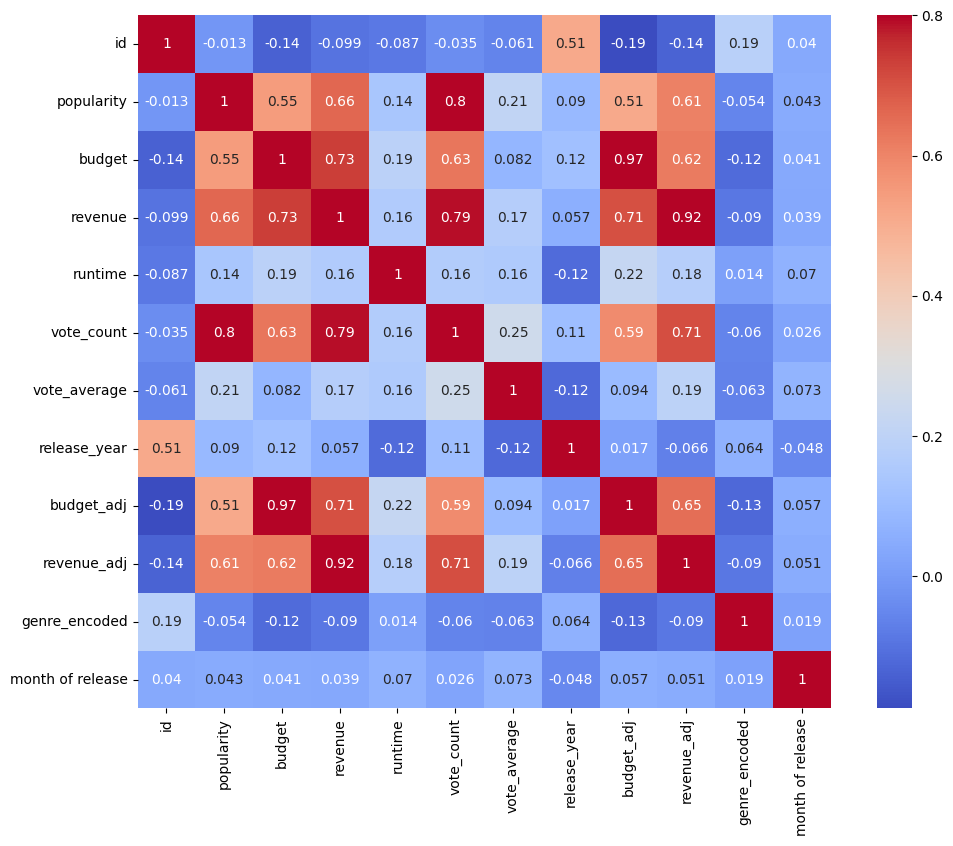

In [14]:
# correlation matrix heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='coolwarm')
plt.show()

In [15]:
# correlation matrix
corrmat = df.corr()

# filter features with correlation greater than 0.6
high_corr_features = corrmat[corrmat > 0.6].stack().reset_index()
high_corr_features = high_corr_features[high_corr_features['level_0'] != high_corr_features['level_1']]
high_corr_features = high_corr_features.dropna()
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# display the selected features
print("Features with correlation greater than 0.6:")
print(high_corr_features)


Features with correlation greater than 0.5:
       Feature 1     Feature 2  Correlation
1             id  release_year     0.511272
3     popularity        budget     0.545263
4     popularity       revenue     0.663266
5     popularity    vote_count     0.800786
6     popularity    budget_adj     0.513306
7     popularity   revenue_adj     0.608962
8         budget    popularity     0.545263
10        budget       revenue     0.734824
11        budget    vote_count     0.632585
12        budget    budget_adj     0.968949
13        budget   revenue_adj     0.622379
14       revenue    popularity     0.663266
15       revenue        budget     0.734824
17       revenue    vote_count     0.791123
18       revenue    budget_adj     0.706341
19       revenue   revenue_adj     0.919089
21    vote_count    popularity     0.800786
22    vote_count        budget     0.632585
23    vote_count       revenue     0.791123
25    vote_count    budget_adj     0.586913
26    vote_count   revenue_adj  

c:\Python37\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python37\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python37\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python37\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python37\Lib\site-package

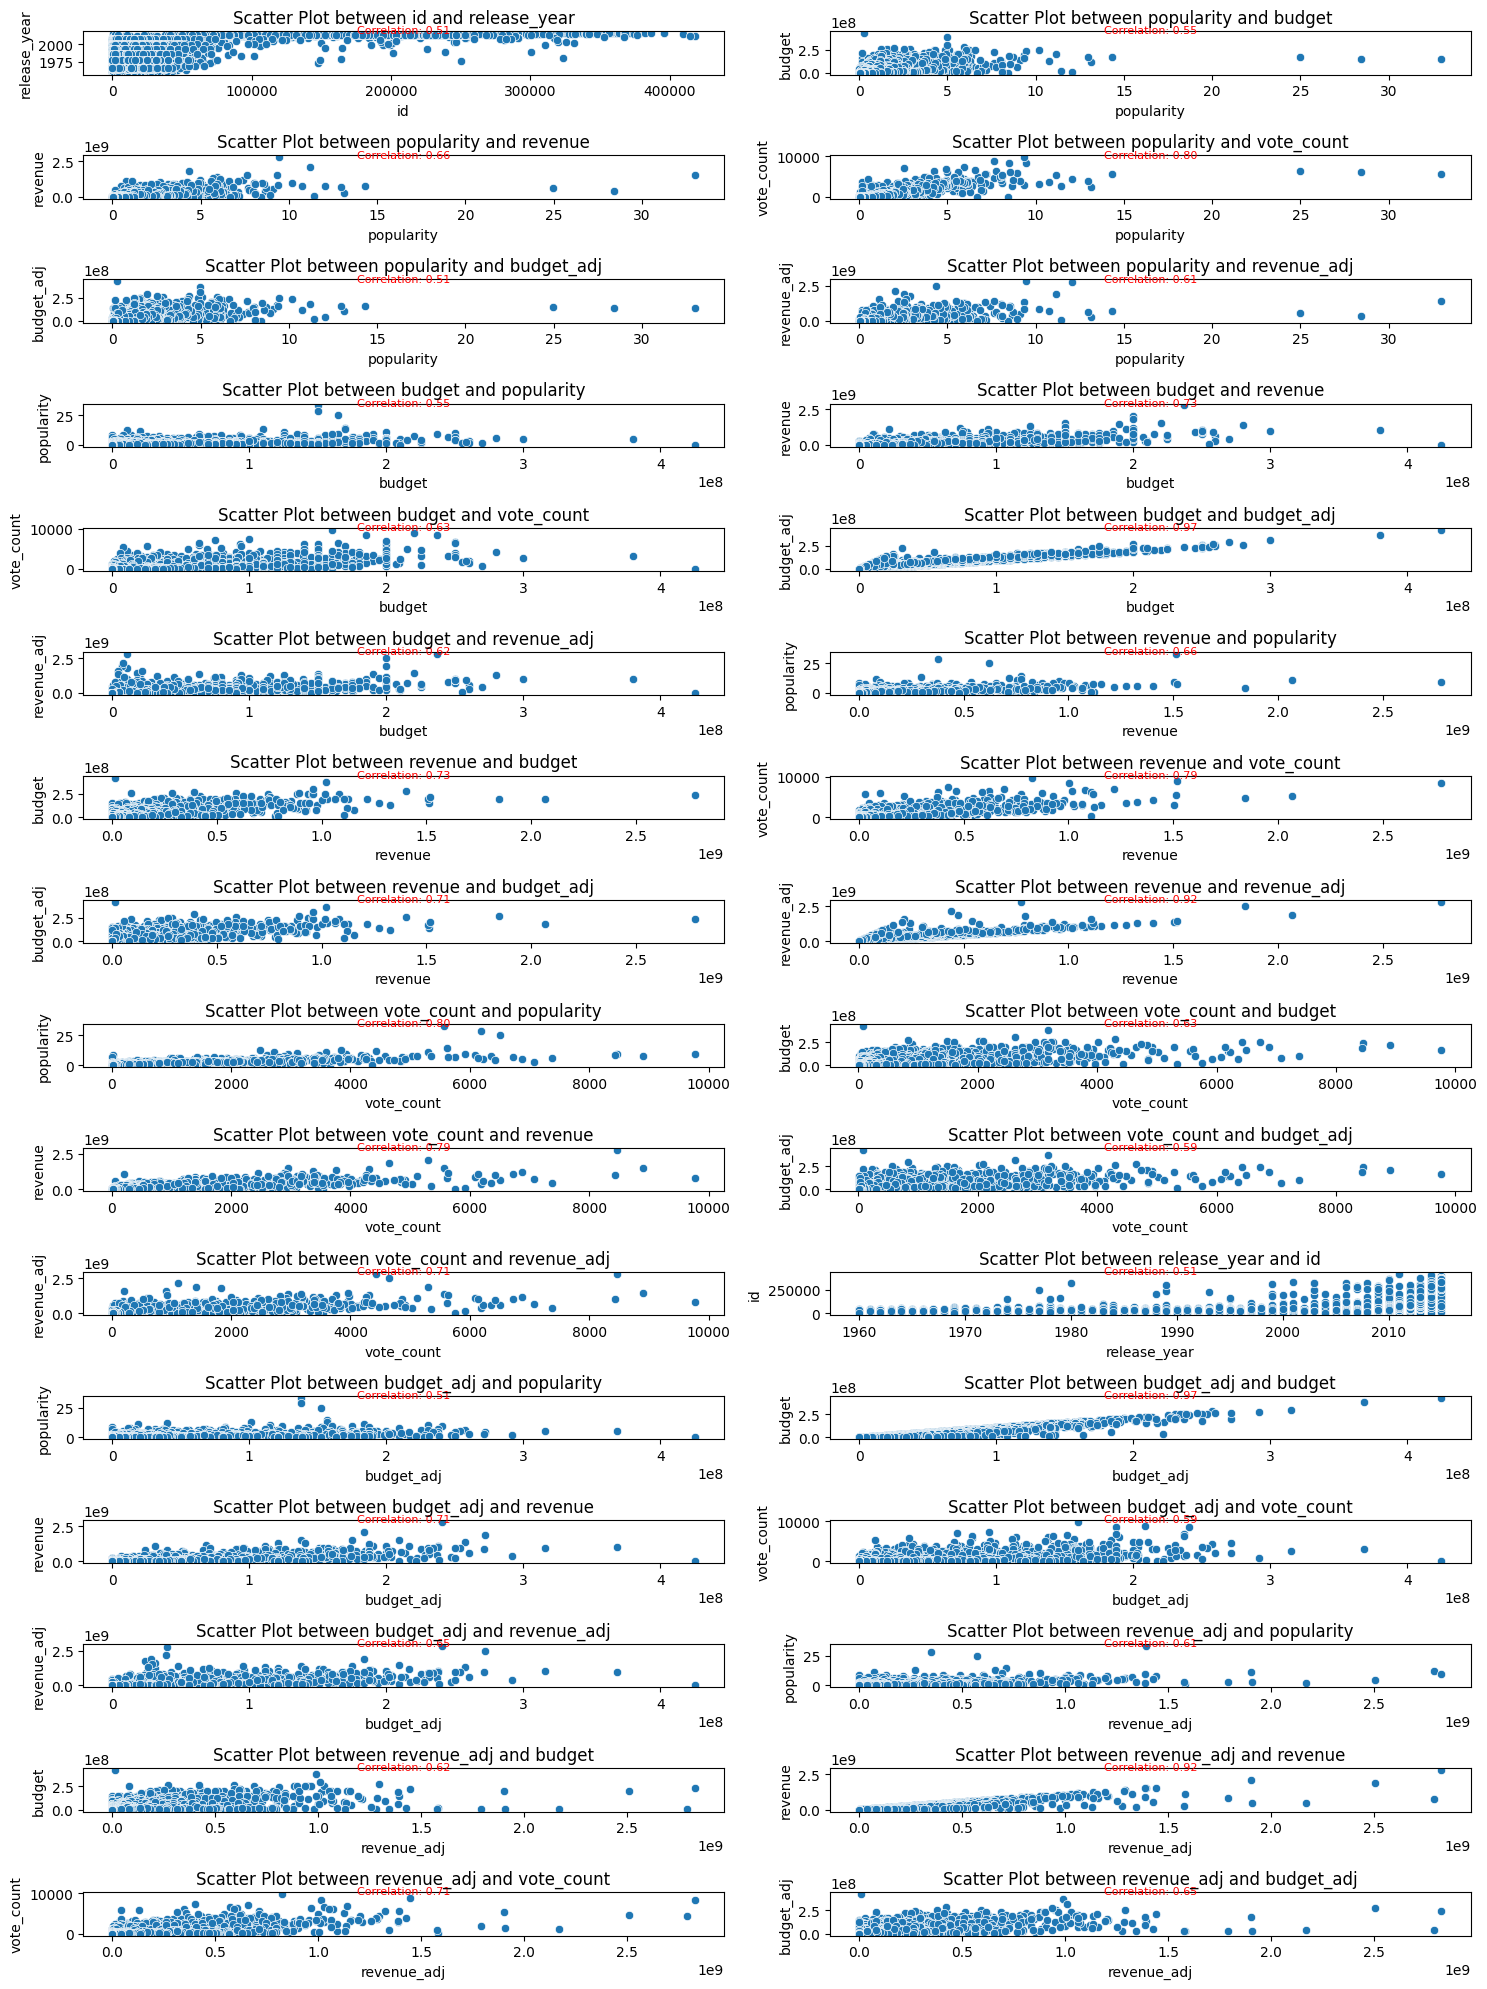

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'high_corr_features' is the DataFrame with correlated features
# Get the list of feature pairs with correlation > 0.6
correlated_pairs = high_corr_features[['Feature 1', 'Feature 2', 'Correlation']]

# Set up the subplots
num_pairs = len(correlated_pairs)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_pairs + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot scatter plots for each pair
for i, (index, row) in enumerate(correlated_pairs.iterrows()):
    ax = axes[i]
    sns.scatterplot(x=row['Feature 1'], y=row['Feature 2'], data=df, ax=ax)
    ax.set_title(f'Scatter Plot between {row["Feature 1"]} and {row["Feature 2"]}')
    ax.set_xlabel(row['Feature 1'])
    ax.set_ylabel(row['Feature 2'])
    
    # Print the correlation value
    correlation_value = row['Correlation']
    ax.annotate(f'Correlation: {correlation_value:.2f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=8, color='red')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()
plt.show()


In [29]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'high_corr_features' is the DataFrame with correlated features
# # Get the list of feature pairs with correlation > 0.6
# # correlated_pairs = high_corr_features[['Feature 1', 'Feature 2', 'Correlation']]

# # Plot scatter plots for each pair
# for index, row in correlated_pairs.iterrows():
#     plt.figure(figsize=(4, 3))
#     sns.scatterplot(x=row['Feature 1'], y=row['Feature 2'], data=df)
#     plt.title(f'Scatter Plot between {row["Feature 1"]} and {row["Feature 2"]}')
#     plt.xlabel(row['Feature 1'])
#     plt.ylabel(row['Feature 2'])
    
#     # Print the correlation value
#     correlation_value = row['Correlation']
#     plt.annotate(f'Correlation: {correlation_value:.2f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=10, color='red')
    
#     plt.show()
